<a href="https://colab.research.google.com/github/decomiteA/ReachRLToolbox/blob/main/MinigridToReaching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#@title Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve as conv

In [53]:
#@title Plot handles

def plot_state_action_values(env,value,ax=None):
  """
  Generate plot showing values of each action in each state
  @Antoine de Comite - Adapted from Neuromatch Academy
  """
  if ax is None:
    fig,ax = plt.subplots()

  for a in range(env.n_actions):
    ax.plot(range(env.n_states),value[:,a],marker='o',linestyle='--')
  ax.set(xlabel='States',ylabel='Values')
  ax.legend(['R','U','L','D'],loc='lower right') # Warning this part is not robust and will have to be adjusted when changing the number of actions ....

def plot_rewards(n_episodes,rewards,average_range=10,ax=None):
  """
  Generate plot showing the total reward accumulated in each episode.
  @Antoine de Comite - Adapted from Neuromatch Academy
  """
  if ax is None:
    fig, ax = plt.subplots()

  smoothed_rewards = (conv(rewards, np.ones(average_range), mode='same')
                      / average_range)

  ax.plot(range(0, n_episodes, average_range),
          smoothed_rewards[0:n_episodes:average_range],
          marker='o', linestyle='--')
  ax.set(xlabel='Episodes', ylabel='Total reward')

def plot_performance(env,value,reward_sums):
  """
  Generate plot outputs
  @Antoine de Comite - Adapted from Neuromatch Academy
  """
  fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(16,22))
  plot_state_action_values(env,value,ax=axes[0])
  plot_rewards(n_episodes,reward_sums,ax=axes[1])





Here is a description of the different environment developped and investigated in this notebook : 

1. TODO


2. TODO



In [54]:
class MiniMesh_OneTarget:
  """
  TODO
  """
  def __init__(self):
    self.name='MiniMesh_OneTarget'
    self.n_states=50
    self.n_actions=4
    self.dim_x=4
    self.dim_y=5
    self.init_state=0

  def get_outcome(self,state,action):
    if state==47:
      reward=0
      next_state=None
      return next_state,reward
    reward =-1 
    if action==0:
      if state%5==4:
        next_state=state
      else:
        next_state=state+1
    
    elif action==1:
      if state>44:
        next_state=state
      else:
        next_state=state+5
      
    elif action==2:
      if state%5==0:
        next_state=state
      else:
        next_state=state-1
    
    elif action==3:
      if state<5:
        next_state=state
      else:
        next_state=state-5
      
    else:
      print("Incorrect action, the selected action should be between 0 and 3")
      next_state = None
      reward = None
    return int(next_state) if next_state is not None else None, reward 

  def get_all_outcomes(self):
    outcomes={}
    for state in range(self.n_states):
      for actin in range(self.n_actions):
        next_state,reward = self.get_outcome(state,action)
        outcomes[state,action]=[(1,next_state,reward)]
    return outcomes

class MiniMesh_Redundancy(MiniMesh_OneTarget):

  def get_outcome(self,state,action):
    if (state==47 or state==48 or state==46):
      reward=0
      next_state=None
      return next_state,reward
    reward =-1 
    if action==0:
      if state%5==4:
        next_state=state
      else:
        next_state=state+1
    
    elif action==1:
      if state>44:
        next_state=state
      else:
        next_state=state+5
      
    elif action==2:
      if state%5==0:
        next_state=state
      else:
        next_state=state-1
    
    elif action==3:
      if state<5:
        next_state=state
      else:
        next_state=state-5
      
    else:
      print("Incorrect action, the selected action should be between 0 and 3")
      next_state = None
      reward = None
    return int(next_state) if next_state is not None else None, reward 

class MiniMesh_TwoTargets(MiniMesh_OneTarget):
  def get_outcome(self,state,action):
    if (state==45 or state==49):
      reward=0
      next_state=None
      return next_state,reward
    reward =-1 
    if action==0:
      if state%5==4:
        next_state=state
      else:
        next_state=state+1
    
    elif action==1:
      if state>44:
        next_state=state
      else:
        next_state=state+5
      
    elif action==2:
      if state%5==0:
        next_state=state
      else:
        next_state=state-1
    
    elif action==3:
      if state<5:
        next_state=state
      else:
        next_state=state-5
      
    else:
      print("Incorrect action, the selected action should be between 0 and 3")
      next_state = None
      reward = None
    return int(next_state) if next_state is not None else None, reward 


class MiniMesh_TwoTargetsRwd(MiniMesh_OneTarget):
  def get_outcome(self,state,action):
    if state==45:
      reward=0
      next_state=None
      return next_state,reward
    elif state==49:
      reward=0.5
      next_state=None
      return next_state,reward  

    reward =-1 
    if action==0:
      if state%5==4:
        next_state=state
      else:
        next_state=state+1
    
    elif action==1:
      if state>44:
        next_state=state
      else:
        next_state=state+5
      
    elif action==2:
      if state%5==0:
        next_state=state
      else:
        next_state=state-1
    
    elif action==3:
      if state<5:
        next_state=state
      else:
        next_state=state-5
      
    else:
      print("Incorrect action, the selected action should be between 0 and 3")
      next_state = None
      reward = None
    return int(next_state) if next_state is not None else None, reward 

class TestMoreAction(MiniMesh_OneTarget):
  """
  this is a test to try what happen with 2 possibilites in each directions...
  """
  def __init__(self):
    self.name='MiniMesh_OneTarget'
    self.n_states=50
    self.n_actions=8
    self.dim_x=4
    self.dim_y=5
    self.init_state=0

  def get_outcome(self,state,action):
    if state==47:
      reward=0
      next_state=None
      return next_state,reward
    if action<4:
      reward = -1
    else:
      reward = -2
      
    if action==0:
      if state%5==4:
        next_state=state
      else:
        next_state=state+1
    
    elif action==1:
      if state>44:
        next_state=state
      else:
        next_state=state+5
      
    elif action==2:
      if state%5==0:
        next_state=state
      else:
        next_state=state-1
    
    elif action==3:
      if state<5:
        next_state=state
      else:
        next_state=state-5

    if action==4:
      if (state%5==3 or state%5==4):
        next_state=state
      else:
        next_state=state+2
    
    elif action==5:
      if state>39:
        next_state=state
      else:
        next_state=state+10
      
    elif action==6:
      if (state%5==0 or state%5==1):
        next_state=state
      else:
        next_state=state-2
    
    elif action==7:
      if state<10:
        next_state=state
      else:
        next_state=state-10
    else:
      print("Incorrect action, the selected action should be between 0 and 7")
      next_state = None
      reward = None
    return int(next_state) if next_state is not None else None, reward 



Definition of the different policies here below

In [55]:
#@title Policies

def epsilon_greedy(q,epsilon):
  """
  This function implements the epsilon greedy policy
  """
  if np.random.random()>epsilon:
    action=np.argmax(q)
  else:
    action=np.random.choice(len(q))
  return action

def greedy(q):
  """
  This function implements the greedy policy (aka optimal policy)
  """
  return np.argmax(q)

Learning the environment using qlearning

In [56]:
#@title Learning the environment

def learn_environment(env,learning_rule,params,max_steps,n_episodes):
  """
  This function learns the environment that the agent interacts with
  """
  value = np.ones((env.n_states,env.n_actions)) # initialize the qfunction

  reward_sums = np.zeros(n_episodes) # this table will contains the total reward of each episode

  # loop over the episodes
  for episode in range(n_episodes):
    state=env.init_state
    reward_sum=0
    for t in range(max_steps):
      #choose next action
      action = epsilon_greedy(value[state],params['epsilon'])
      #observe outcome of action on environment
      next_state, reward = env.get_outcome(state,action)
      #update value function
      value = learning_rule(state,action,reward,next_state,value,params)
      #sum rewards obtained
      reward_sum +=reward

      if next_state is None:
        reward_sum += 0
        break
      state = next_state
  
    reward_sums[episode] = reward_sum

  return value, reward_sums

def simulate_episode(env,params,max_steps):
  state_history=np.zeros(max_steps)
  state=env.init_state
  reward_sum=0
  for t in range(max_steps):
    action = epsilon_greedy(value[state],params['epsilon'])
    next_state,reward=env.get_outcome(state,action)
    reward_sum += reward_sum  

    if next_state is None:
      reward_sum +=0
      break
    state_history[t]=state
    state=next_state

  return state_history,reward_sum

In [57]:
def q_learning(state,action,reward,next_state,value,params):
  """
  This function implements the q-learning algorithm
  """
  q=value[state,action]
  if next_state is None:
    max_next_q=0
  else:
    max_next_q=np.max(value[next_state])

  #compute td error
  td_error = reward + params['gamma']*max_next_q-q

  #update q-value 
  value[state,action] = q+params['alpha']*td_error
  return value

Simulations 

Incorrect action, the selected action should be between 0 and 7


TypeError: ignored

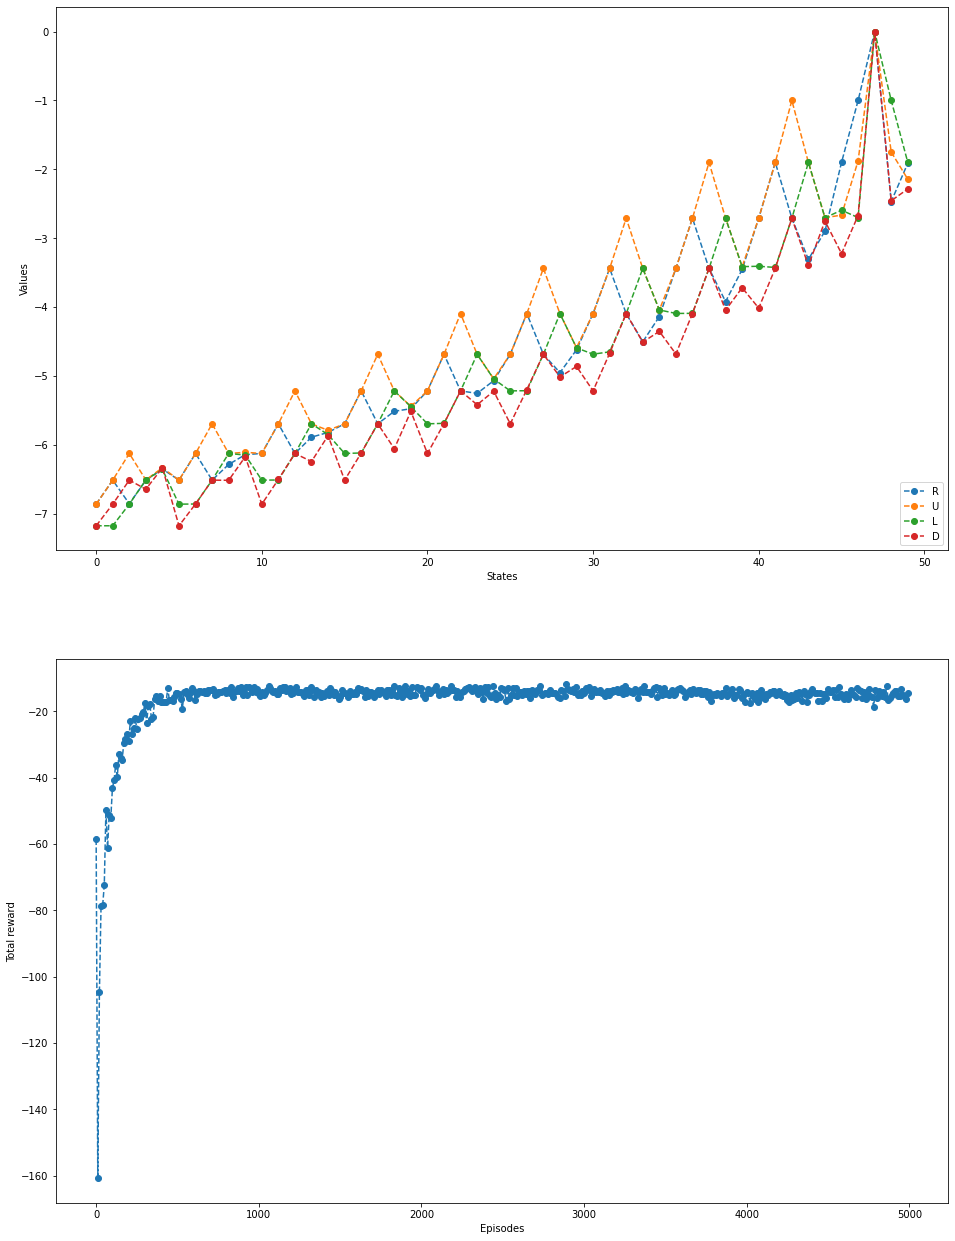

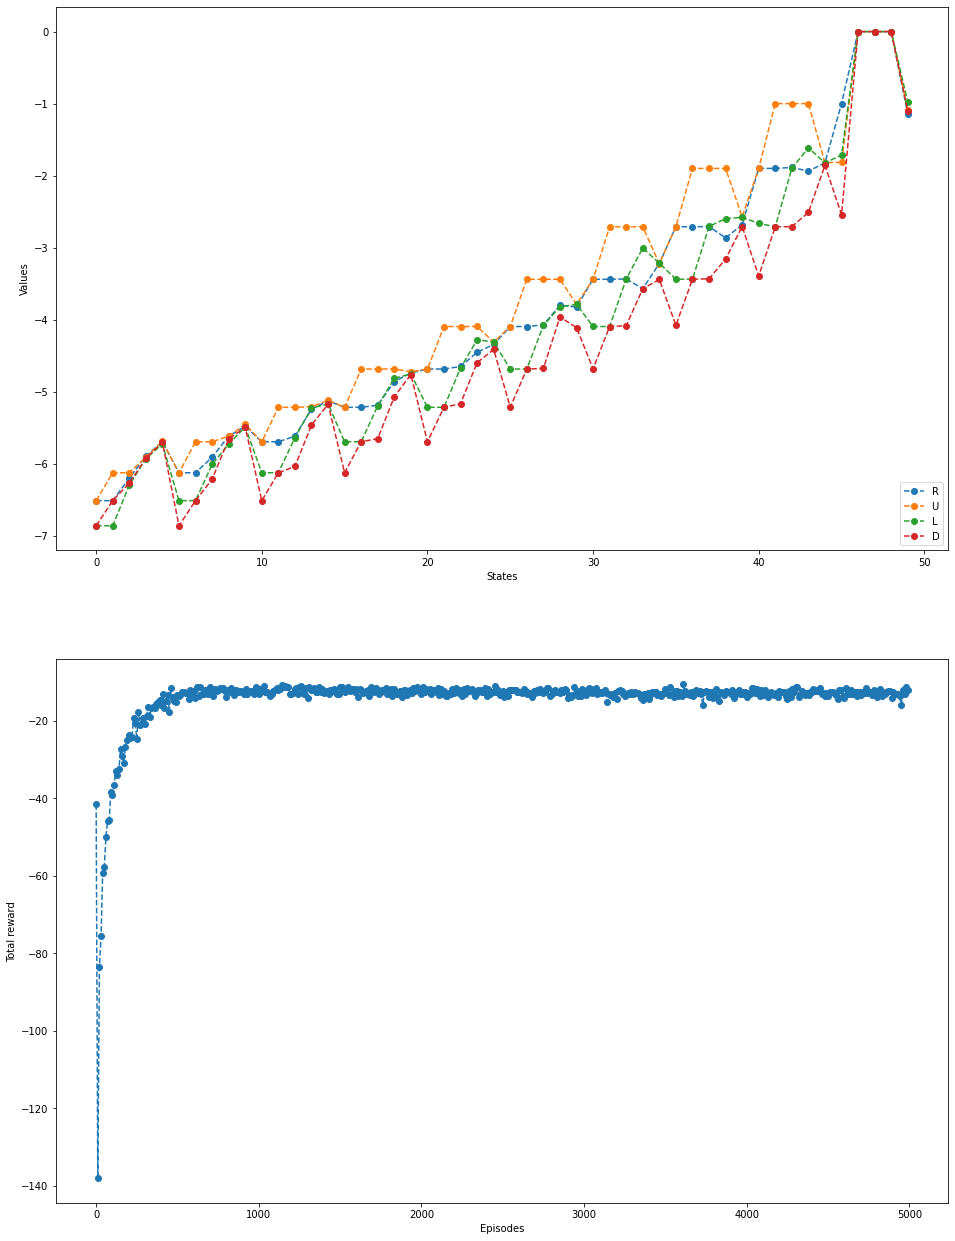

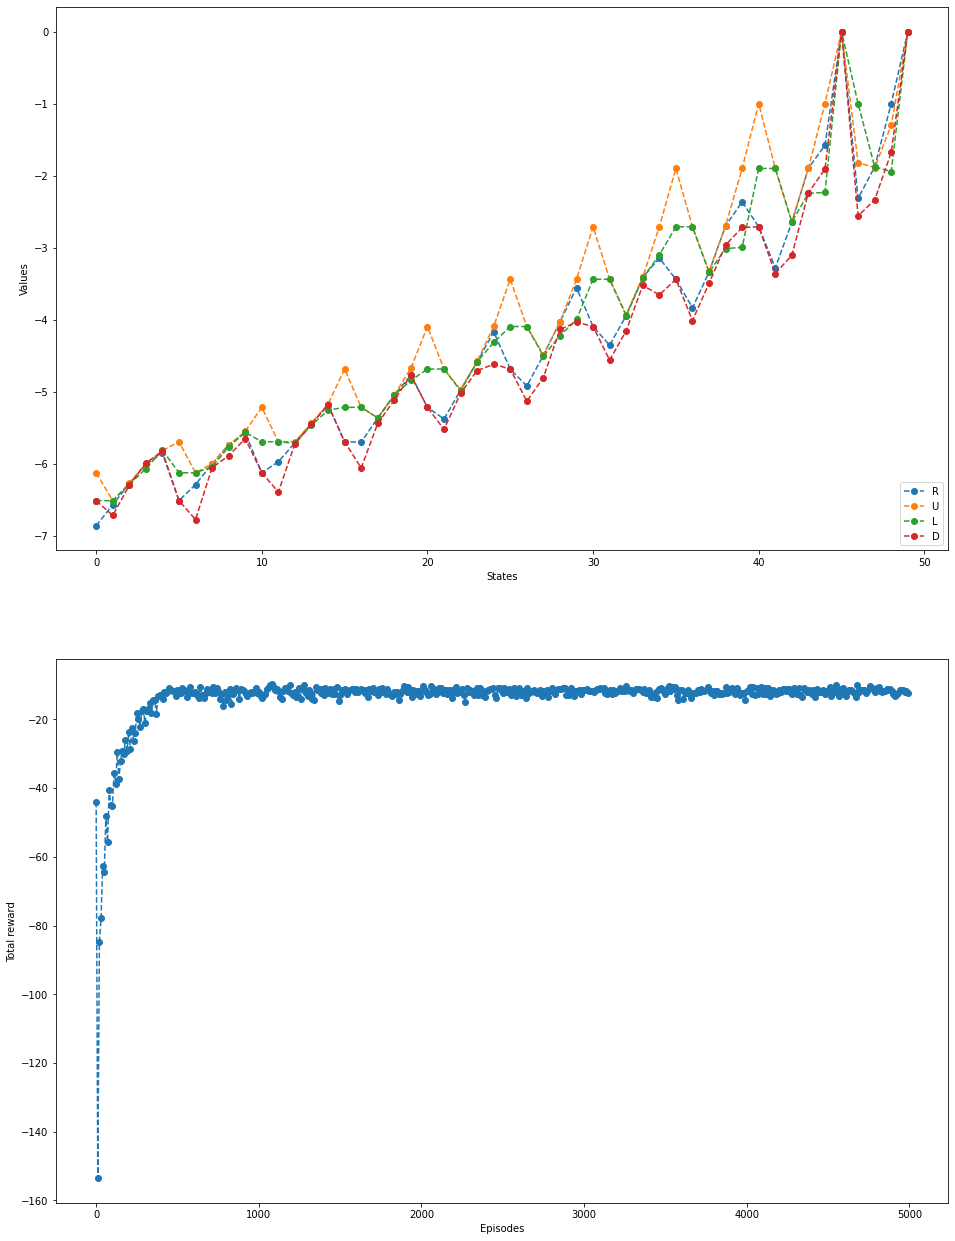

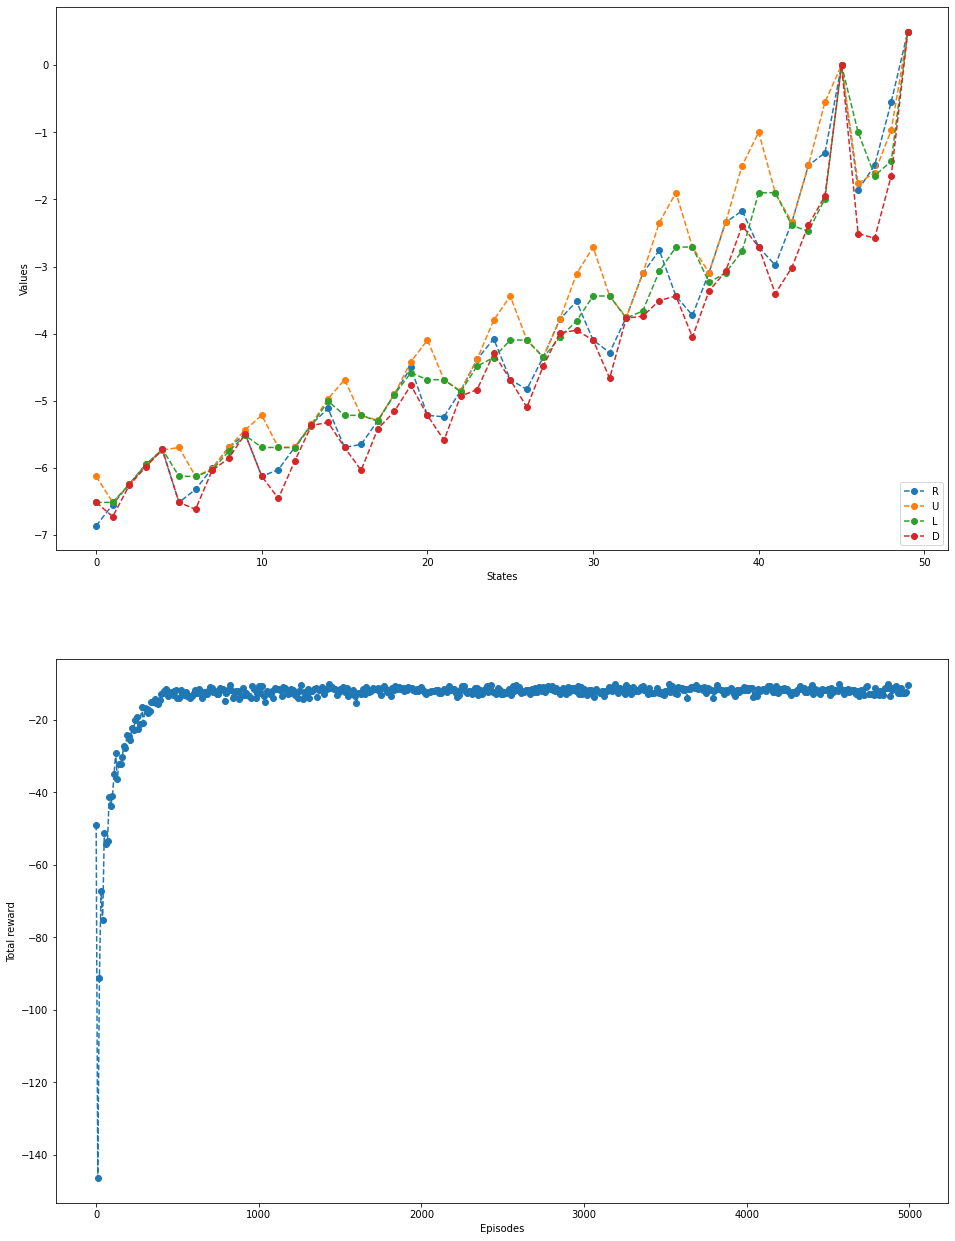

In [58]:
params = {
    'epsilon':0.2,
    'alpha':0.1,
    'gamma':0.9,
}

env_test = MiniMesh_OneTarget()
env_red = MiniMesh_Redundancy()
env_Two = MiniMesh_TwoTargets()
env_rwd = MiniMesh_TwoTargetsRwd()
env_mact = TestMoreAction()
n_episodes=5000
max_steps=3000
value_qlearning,reward_sums_qlearning = learn_environment(env_test,q_learning,params,max_steps,n_episodes)

plot_performance(env_test,value_qlearning,reward_sums_qlearning)



value_qlearning,reward_sums_qlearning = learn_environment(env_red,q_learning,params,max_steps,n_episodes)

plot_performance(env_red,value_qlearning,reward_sums_qlearning)

value_qlearning,reward_sums_qlearning = learn_environment(env_Two,q_learning,params,max_steps,n_episodes)

plot_performance(env_Two,value_qlearning,reward_sums_qlearning)

value_qlearning,reward_sums_qlearning = learn_environment(env_rwd,q_learning,params,max_steps,n_episodes)

plot_performance(env_rwd,value_qlearning,reward_sums_qlearning)

value_qlearning,reward_sums_qlearning = learn_environment(env_mact,q_learning,params,max_steps,n_episodes)

plot_performance(env_mact,value_qlearning,reward_sums_qlearning)

#uncomment the lines herebelow to investigate the "optimised" strategy
#state_history,reward_sum = simulate_episode(env_test,params,max_steps)
#print(state_history)